In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

# Image read and write/save image using [scikit-image](https://scikit-image.org/)

For installation please go through: https://scikit-image.org/docs/stable/user_guide/install.html

# <font color='red'>Warning: Please do not use the command sudo and pip together as pip may overwrite critical system libraries which may require you to reinstall your operating system.</font>


band1 image size: (512, 512)


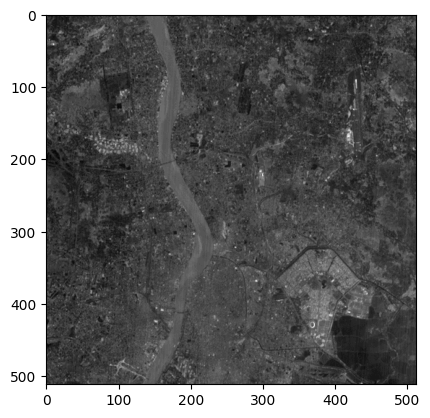

In [2]:
# IMAGE FILE NAME YOU WANT TO READ
img_filename = 'band1.gif'

img = plt.imread(img_filename).astype('double').mean(axis=2)

print('band1 image size: {}' .format(img.shape))

# DISPLAY
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
# Reading Images

img_1= plt.imread('band1.gif').astype('double').mean(axis=2)
img_2= plt.imread('band2.gif').astype('double').mean(axis=2)
img_3= plt.imread('band3.gif').astype('double').mean(axis=2)
img_4= plt.imread('band4.gif').astype('double').mean(axis=2)

In [4]:
def pixel_intensity(image, x, y):
    """Get intensity of pixel at given coordinates (x, y) in the image."""
    intensity = image[y, x]
    return intensity

# River

In [5]:
river_x = []
river_y = []

import csv

with open('annotated_points_band4_np_50.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        river_x.append(float(row['row']))
        river_y.append(float(row['column']))


In [6]:
# Calculating intensity

img_1_intensity=[]
for i in range (len(river_x)):
    intensity = pixel_intensity(img_1,int(river_x[i]),int(river_y[i]))
    img_1_intensity.append(intensity)

img_2_intensity=[]
for i in range (len(river_x)):
    intensity = pixel_intensity(img_2,int(river_x[i]),int(river_y[i]))
    img_2_intensity.append(intensity)

img_3_intensity=[]
for i in range (len(river_x)):
    intensity = pixel_intensity(img_3,int(river_x[i]),int(river_y[i]))
    img_3_intensity.append(intensity)

img_4_intensity=[]
for i in range (len(river_x)):
    intensity = pixel_intensity(img_4,int(river_x[i]),int(river_y[i]))
    img_4_intensity.append(intensity)


In [7]:
# River Dataframe

df_river = pd.DataFrame({
    'X' : river_x,
    'Y' : river_y,
    'Band_1': img_1_intensity,
    'Band_2': img_2_intensity,
    'Band_3': img_3_intensity,
    'Band_4': img_4_intensity,
    'label' : "0"
},index = pd.RangeIndex(start=1, stop=len(img_1_intensity)+1))

In [8]:
df_small_river = df_river.iloc[:,2:6]

# Mean
river_mean = []
column_means_river = df_small_river.mean(axis=0)
river_mean = np.array(column_means_river)
river_mean

array([94.875, 83.49 , 83.565, 89.19 ])

In [9]:
# Covariance
river_covariance = []
covariance_matrix_river = np.cov(df_small_river, rowvar=False)
river_covariance = np.array(covariance_matrix_river)
river_covariance

array([[ 7.07716837,  6.13010204,  7.59375   ,  4.52295918],
       [ 6.13010204,  5.84173469,  7.37311224,  4.97387755],
       [ 7.59375   ,  7.37311224, 12.85920918,  3.01545918],
       [ 4.52295918,  4.97387755,  3.01545918, 43.15959184]])

# Land

In [10]:
land_x = []
land_y = []

with open('annotated_points_band4_np_150.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        land_x.append(float(row['row']))
        land_y.append(float(row['column']))


In [11]:
# Calculating Intensity

img_1_intensity=[]
for i in range (len(land_x)):
    intensity = pixel_intensity(img_1,int(land_x[i]),int(land_y[i]))
    img_1_intensity.append(intensity)

img_2_intensity=[]
for i in range (len(land_x)):
    intensity = pixel_intensity(img_2,int(land_x[i]),int(land_y[i]))
    img_2_intensity.append(intensity)

img_3_intensity=[]
for i in range (len(land_x)):
    intensity = pixel_intensity(img_3,int(land_x[i]),int(land_y[i]))
    img_3_intensity.append(intensity)

img_4_intensity=[]
for i in range (len(land_x)):
    intensity = pixel_intensity(img_4,int(land_x[i]),int(land_y[i]))
    img_4_intensity.append(intensity)


In [12]:
# Land Dataframe

df_land = pd.DataFrame({
    'X' : land_x,
    'Y' : land_y,
    'Band_1': img_1_intensity,
    'Band_2': img_2_intensity,
    'Band_3': img_3_intensity,
    'Band_4': img_4_intensity,
    'label' : "1"
},index=pd.RangeIndex(start=1, stop=len(img_1_intensity)+1))

In [13]:
df_small_land = df_land.iloc[:,2:6]

# Mean
land_mean = []
column_means_non_river= df_small_land.mean(axis=0)
land_mean = np.array(column_means_non_river)
land_mean

array([94.07 , 82.895, 83.16 , 89.42 ])

In [14]:
# Covariance
land_covariance = []
covariance_matrix_land = np.cov(df_small_land, rowvar=False)
land_covariance = np.array(covariance_matrix_land)
land_covariance

array([[ 4.97828859,  4.26327181,  5.00466443,  1.72333893],
       [ 4.26327181,  4.27119966,  5.03411074,  2.58256711],
       [ 5.00466443,  5.03411074,  7.77624161,  1.85768456],
       [ 1.72333893,  2.58256711,  1.85768456, 17.31402685]])

# Classifying Images

In [15]:
# Multivariate Gaussian Function
def multivariate_gaussian(x, mean, covariance):
    n = len(x)
    det = np.linalg.det(covariance)
    inv_covariance = np.linalg.inv(covariance)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, inv_covariance), (x - mean))
    prefactor = 1 / ((2 * np.pi) ** (n / 2) * det ** 0.5)
    return prefactor * np.exp(exponent)

# Image
stacked_images = np.stack((img_1, img_2, img_3, img_4), axis = -1)

final_image_array=[]
prior_river = 50/200
prior_non_river =150/200

for i in range (512):
    for j in range (512):
        dist_river=multivariate_gaussian(stacked_images[i,j],river_mean,river_covariance)
        class_value_river=prior_river*dist_river
        dist_non_river=multivariate_gaussian(stacked_images[i,j],land_mean,land_covariance)
        class_value_non_river=prior_non_river*dist_non_river

        if class_value_river>class_value_non_river:
            final_image_array.append(0)
        else:
            final_image_array.append(1)

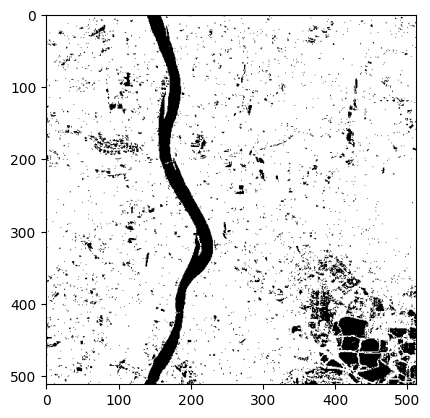

In [16]:
final_image= np.array(final_image_array).reshape(512, 512)

plt.imsave('image.png',final_image,cmap='gray')
plt.imshow(final_image, cmap='gray')
plt.show()

In [17]:
merged_df = pd.concat([df_river, df_land], ignore_index = True)
merged_df_small = merged_df.iloc[:,:2]

pred_list = []
for i in range (200):
    pred = final_image[int(merged_df_small.loc[i,'X'])][int(merged_df_small.loc[i,'Y'])]
    pred_list.append(pred)

y_label = merged_df.iloc[:,6:7]
y_true = y_label['label'].values
str_pred_list = [str(value) for value in pred_list]

# Accuracy

In [18]:
accuracy = np.mean(y_true==str_pred_list)
print("Accuracy is : ", accuracy *100 ,"%")

Accuracy is :  96.0 %


In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, str_pred_list)
conf_matrix

array([[ 47,   3],
       [  5, 145]])

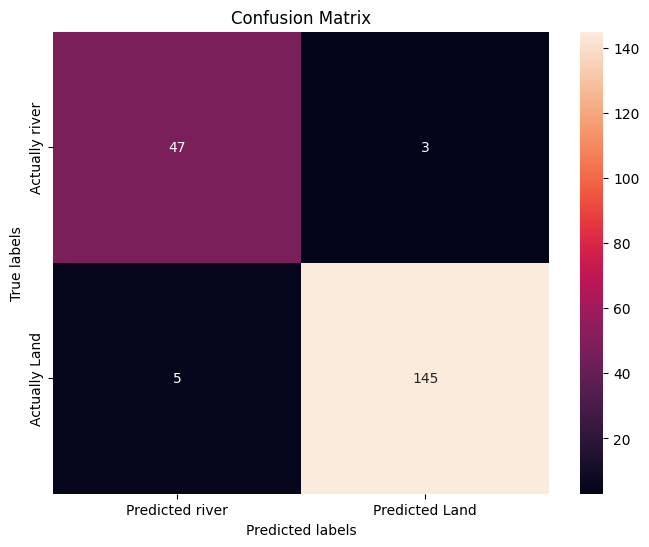

In [20]:
# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=['Predicted river', 'Predicted Land'], yticklabels=['Actually river', 'Actually Land'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()